In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("result/multiple/240222/multiple.csv", index_col=0)

In [4]:
# Casenameを_で分割して新しい列を作成
df[['Var1', 'Var2', 'Var3', 'Var4', 'Var5', 'Var6', 'Var7', 'Var8', 'Var9', 'Var10']] = df['Casename'].str.split('_', expand=True)
# df[['Var1', 'Var2', 'Var3', 'Var4', 'Var5', 'Var6']] = df['Casename'].str.split('_', expand=True)

C:\Users\44860\AppData\Local\Temp\ipykernel_26660\3914816867.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('tab20', len(df['Coloring'].unique()))
C:\Users\44860\AppData\Local\Temp\ipykernel_26660\3914816867.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  subset = df[df['Coloring'] == casename][df['Var1'] == 'ExpAdo']
C:\Users\44860\AppData\Local\Temp\ipykernel_26660\3914816867.py:40: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  subset = df[df['Coloring'] == casename][df['Var1'] == 'R&D']
C:\Users\44860\AppData\Local\Temp\ipykernel_26660\3914816867.py:45: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  subset = df[df['Coloring'] == casename][df['Var1'] == 'Ado']
C:\Users\44860\AppData\

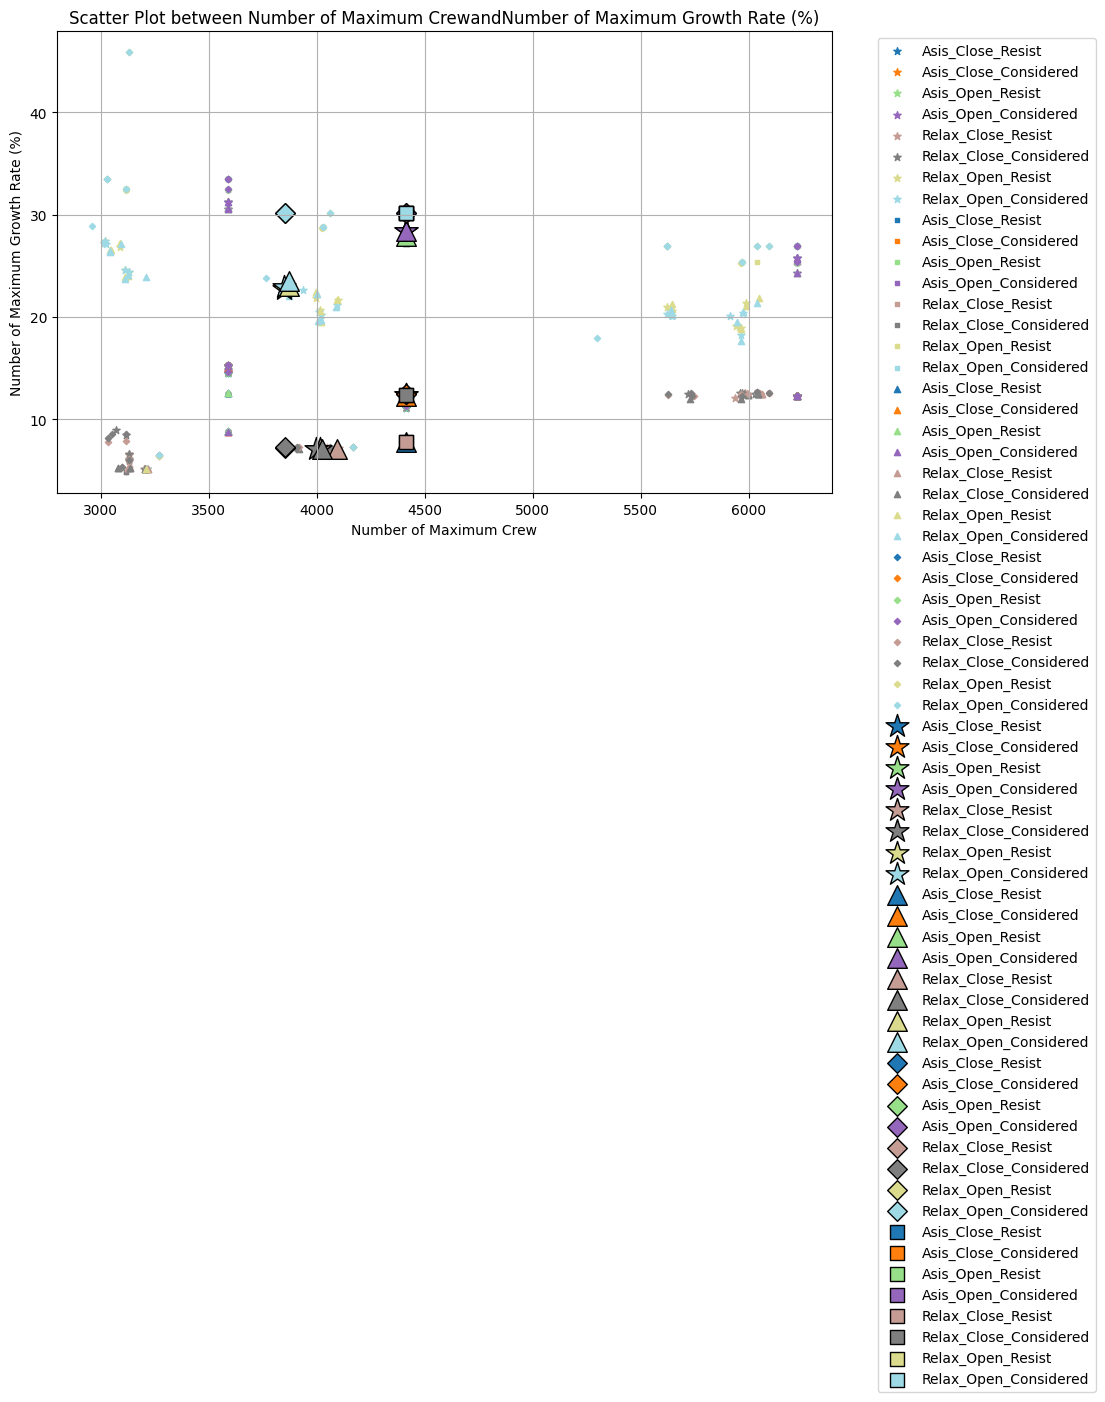

In [7]:
coloring_variables = ['Var2', 'Var3', 'Var4'] #'Var1', 
# v1='Introduction Year (Full)'
# v1='Introduction Year (Auto)'
# v2='Autonomous Ship introduction ratio at 2040 (-)'
# v2='Full Autonomous Ship introduction ratio at 2040 (-)'
# v2='Number of crew at 2040'
# v1='Subsidy (USD)'
v1='Number of Maximum Crew'
v2='Number of Maximum Growth Rate (%)'
# v2='Estimated num of Accident (case/year)'
# v2='Estimated num of Seafarer (person)'

df['Coloring'] = df[coloring_variables].apply('_'.join, axis=1)
colormap = plt.cm.get_cmap('tab20', len(df['Coloring'].unique()))

condition = (df['Var5'] == 'Average')
c1 = (df['Var6'] == '2')
c2 = (df['Var7'] == '2')
c3 = (df['Var8'] == '2')
c4 = (df['Var9'] == '1.5')
c5 = (df['Var10'] == '10000')
c6 = (df['Var1'] == 'ExpAdo')
c7 = (df['Var2'] == 'Asis')
c8 = (df['Var3'] == 'Close')
c9 = (df['Var4'] == 'Resist')

# marker_map = {'A': 'o', 'B': 's', 'C': '^', 'D': 'D', 'E': 'v', 'F': '<', 'G': '>', 'H': 'p', 'I': '*', 'J': '+'}
# markering_variables = ['Var9', 'Var10']
# df['Markering'] = df[markering_variables].apply('_'.join, axis=1)
# # marker=marker_map.get(casename, 'o'),

fig, ax = plt.subplots(figsize=(10, 6))

for idx, casename in enumerate(df['Coloring'].unique()):
    subset = df[df['Coloring'] == casename][df['Var1'] == 'ExpAdo']
    ax.scatter(subset[v1], subset[v2],
               label=casename, color=colormap(idx), marker='*', s=30)

for idx, casename in enumerate(df['Coloring'].unique()):
    subset = df[df['Coloring'] == casename][df['Var1'] == 'R&D']
    ax.scatter(subset[v1], subset[v2],
               label=casename, color=colormap(idx), marker='s', s=10)
    
for idx, casename in enumerate(df['Coloring'].unique()):
    subset = df[df['Coloring'] == casename][df['Var1'] == 'Ado']
    ax.scatter(subset[v1], subset[v2],
               label=casename, color=colormap(idx), marker='^', s=20)
    
for idx, casename in enumerate(df['Coloring'].unique()):
    subset = df[df['Coloring'] == casename][df['Var1'] == 'Exp']
    ax.scatter(subset[v1], subset[v2],
               label=casename, color=colormap(idx), marker='D', s=10)

for idx, casename in enumerate(df['Coloring'].unique()):
    subset2 = df[df['Coloring'] == casename][condition][c1][c2][c3][c4][c5][c6] #[c7][c8][c9]
    ax.scatter(subset2[v1], subset2[v2],
               label=casename, color=colormap(idx), marker='*', ec="k", s=300)

for idx, casename in enumerate(df['Coloring'].unique()):
    subset2 = df[df['Coloring'] == casename][condition][c1][c2][c3][c4][c5][df['Var1'] == 'Ado'] #[c7][c8][c9]
    ax.scatter(subset2[v1], subset2[v2],
               label=casename, color=colormap(idx), marker='^', ec="k", s=200)

for idx, casename in enumerate(df['Coloring'].unique()):
    subset2 = df[df['Coloring'] == casename][condition][c1][c2][c3][c4][c5][df['Var1'] == 'Exp'] #[c7][c8][c9]
    ax.scatter(subset2[v1], subset2[v2],
               label=casename, color=colormap(idx), marker='D', ec="k", s=100)

for idx, casename in enumerate(df['Coloring'].unique()):
    subset2 = df[df['Coloring'] == casename][condition][c1][c2][c3][c4][c5][df['Var1'] == 'R&D'] #[c7][c8][c9]
    ax.scatter(subset2[v1], subset2[v2],
               label=casename, color=colormap(idx), marker='s', ec="k", s=100)

ax.set_xlabel(v1)
ax.set_ylabel(v2)
ax.set_title('Scatter Plot between '+v1+'and'+v2)
ax.legend()

ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

ax.grid(True)

plt.show()

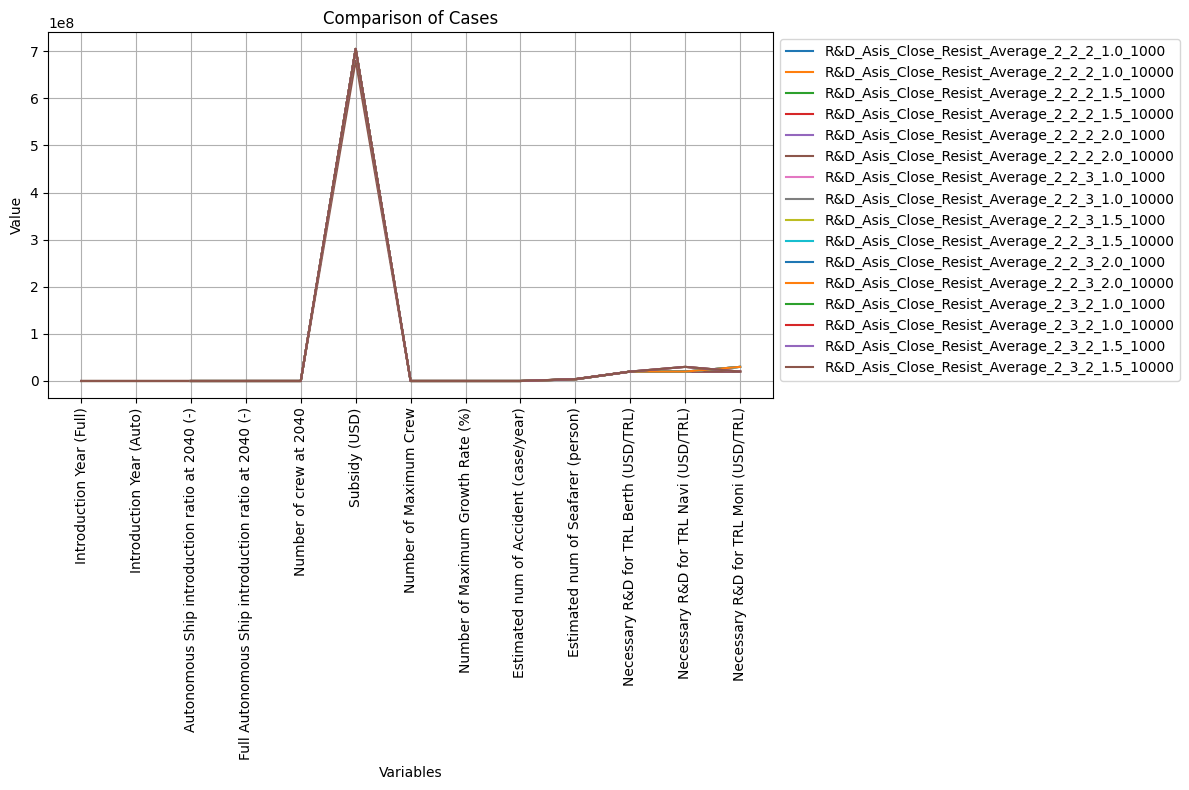

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# データをDataFrameに読み込む
data = {
    "Casename": ["R&D_Asis_Close_Resist_Average_2_2_2_1.0_1000", "R&D_Asis_Close_Resist_Average_2_2_2_1.0_10000",
                 "R&D_Asis_Close_Resist_Average_2_2_2_1.5_1000", "R&D_Asis_Close_Resist_Average_2_2_2_1.5_10000",
                 "R&D_Asis_Close_Resist_Average_2_2_2_2.0_1000", "R&D_Asis_Close_Resist_Average_2_2_2_2.0_10000",
                 "R&D_Asis_Close_Resist_Average_2_2_3_1.0_1000", "R&D_Asis_Close_Resist_Average_2_2_3_1.0_10000",
                 "R&D_Asis_Close_Resist_Average_2_2_3_1.5_1000", "R&D_Asis_Close_Resist_Average_2_2_3_1.5_10000",
                 "R&D_Asis_Close_Resist_Average_2_2_3_2.0_1000", "R&D_Asis_Close_Resist_Average_2_2_3_2.0_10000",
                 "R&D_Asis_Close_Resist_Average_2_3_2_1.0_1000", "R&D_Asis_Close_Resist_Average_2_3_2_1.0_10000",
                 "R&D_Asis_Close_Resist_Average_2_3_2_1.5_1000", "R&D_Asis_Close_Resist_Average_2_3_2_1.5_10000"],
    "Introduction Year (Full)": [2034, 2034, 2034, 2034, 2034, 2034, 2034, 2034, 2034, 2034, 2034, 2034, 2040, 2040, 2040, 2040],
    "Introduction Year (Auto)": [2048, 2048, 2048, 2048, 2048, 2048, None, None, None, None, None, None, None, None, None, None],
    "Autonomous Ship introduction ratio at 2040 (-)": [63.70143149, 63.70143149, 63.70143149, 63.70143149, 92.22903885, 92.22903885, 63.70143149, 63.70143149, 63.70143149, 63.70143149, 92.22903885, 92.22903885, 9.81595092, 9.81595092, 20.14314928, 20.14314928],
    "Full Autonomous Ship introduction ratio at 2040 (-)": [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    "Number of crew at 2040": [3851, 3851, 3851, 3851, 3990.5, 3990.5, 3851, 3851, 3851, 3851, 3990.5, 3990.5, 4171, 4171, 4070, 4070],
    "Subsidy (USD)": [705000000, 705000000, 705000000, 705000000, 705000000, 680000000, 705000000, 705000000, 705000000, 705000000, 705000000, 705000000, 705000000, 705000000, 705000000, 705000000],
    "Number of Maximum Crew": [4411, 4411, 4411, 4411, 4411, 4411, 4411, 4411, 4411, 4411, 4411, 4411, 4411, 4411, 4411, 4411],
    "Number of Maximum Growth Rate (%)": [31.94500067, 31.94500067, 27.48800959, 27.48800959, 26.53622251, 27.5862069, 7.284079084, 7.284079084, 7.730673317, 7.730673317, 12.44615733, 27.48027731, 7.284079084, 7.284079084, 7.730673317, 7.730673317],
    "Estimated num of Accident (case/year)": [0.042093446, 0.042093446, 0.04147469, 0.04147469, 0.038949005, 0.038901842, 0.042477019, 0.042477019, 0.041984593, 0.041984593, 0.040770459, 0.040745879, 0.043361355, 0.043361355, 0.042680275, 0.042680275],
    "Estimated num of Seafarer (person)": [3773444.536, 3773444.536, 3616977.955, 3616977.955, 3427972.904, 3393711.578, 3860683.66, 3860683.66, 3745408.982, 3745408.982, 3647558.636, 3602137.907, 4128039.469, 4128039.469, 3982301.578, 3982301.578],
    "Necessary R&D for TRL Berth (USD/TRL)": [20000000, 20000000, 20000000, 20000000, 20000000, 20000000, 20000000, 20000000, 20000000, 20000000, 20000000, 20000000, 20000000, 20000000, 20000000, 20000000],
    "Necessary R&D for TRL Navi (USD/TRL)": [20000000, 20000000, 20000000, 20000000, 20000000, 20000000, 20000000, 20000000, 20000000, 20000000, 20000000, 20000000, 30000000, 30000000, 30000000, 30000000],
    "Necessary R&D for TRL Moni (USD/TRL)": [20000000, 20000000, 20000000, 20000000, 20000000, 20000000, 30000000, 30000000, 30000000, 30000000, 30000000, 30000000, 20000000, 20000000, 20000000, 20000000]
}

df = pd.DataFrame(data)

# Casename列を除いた列を取得
columns = df.columns[1:]

# グラフを描画
plt.figure(figsize=(12, 8))
for casename, row in df.iterrows():
    plt.plot(columns, row[1:], label=row["Casename"])

plt.title('Comparison of Cases')
plt.xlabel('Variables')
plt.ylabel('Value')
plt.xticks(rotation=90)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.show()